In [1]:
# read in the data
final = scan("final")
head(final)

[1]  2.000000 20.000000 16.188550  1.857077 24.110950  1.831814

In [2]:
# turn to matrix
final = matrix(final,12,874)
head(final)

2.000000,6.000000,1.000000,3.000000,12.000000,13.000000,17.000000,18.000000,20.000000,22.000000,...,841.000000,845.0000000,846.000000,870.0000000,885.0000000,891.000000,905.000000,925.000000,953.0000000,955.00000
20.000000,15.755600,15.003110,14.132080,16.101200,11.504800,12.013270,10.000000,12.746430,18.686510,...,16.722730,17.8626700,10.759510,15.8969900,14.1215600,17.085380,19.959810,14.997190,11.1112400,16.27427
16.188550,16.739840,15.101400,14.572190,15.595690,12.595730,12.847740,13.904870,14.430840,17.402140,...,15.364540,17.0439300,12.040200,16.1594100,15.8524800,15.979520,18.911850,15.431150,14.4515100,16.94960
1.857077,2.318855,1.940486,2.164948,1.891039,2.065283,2.416031,1.936810,1.838844,2.099650,...,2.275911,2.2550620,2.058041,2.3198860,2.4328920,2.308515,2.349004,2.390848,2.4027020,2.29594
24.110950,19.639040,23.222530,25.267910,16.456310,27.965890,21.314080,13.222470,17.149840,19.481110,...,22.735650,19.2517000,12.753410,21.0844300,19.8731400,21.446260,27.767630,18.964820,17.3067300,20.44962
1.831814,1.925874,1.599497,3.579100,1.436735,1.758638,1.397223,1.000441,1.983947,2.454884,...,1.575991,0.8929076,1.182923,0.8118587,0.6918162,1.871675,1.458463,1.325294,0.8978423,1.45263


In [3]:
# get a subset of this matrix
results2 =  final[2:11,]

In [4]:
# get the variance
resvar = apply(results2,1,var)
results3 = results2/sqrt(resvar)
cr = var(t(results3))

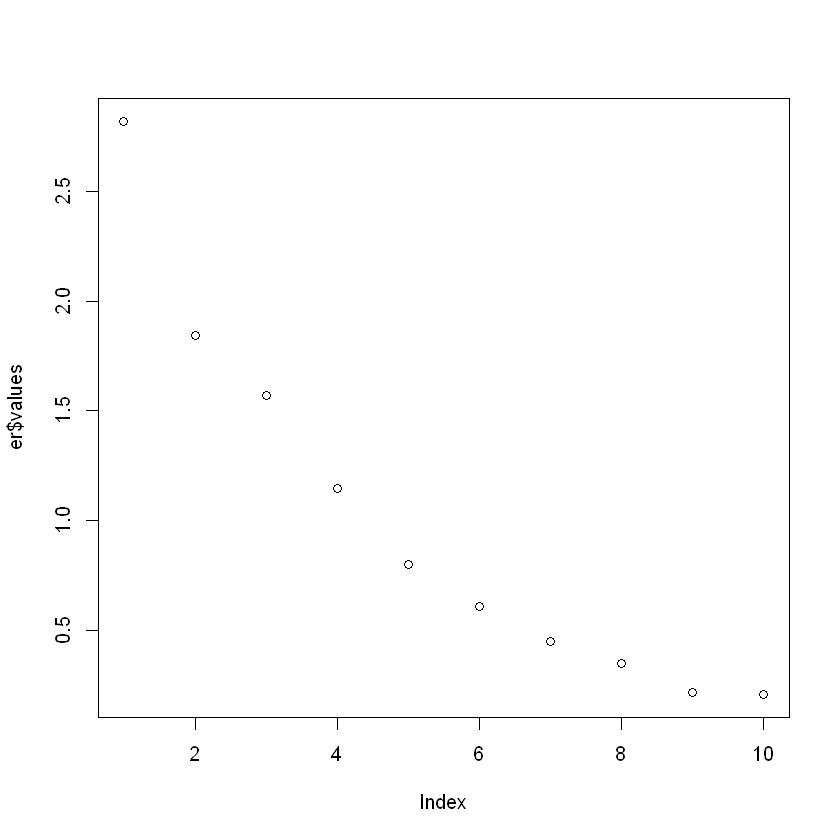

In [5]:
# get the eigenvalues
er = eigen(cr)
plot(er$values)

In [6]:
stroke = function(x1,y1,theta,len,width)
{
    x=c(1:16)
    y=c(1:16)
    x=x-x1
    y=y-y1
    u1=x*cos(theta)
    u2=y*sin(theta)
    #u=ones %*% t(u1) + t(ones %*% t(u2))
    u=matrix(u1,16,16)+t(matrix(u2,16,16))
    v1=-x*sin(theta)
    v2=y*cos(theta)
    #v=(ones %*% t(v1) + t(ones %*% t(v2)))
    v=matrix(v1,16,16)+t(matrix(v2,16,16))
    m = (v > 0 & v < len)
    exp(-u*u/width)*m
}

In [7]:
p=t(results3[1:10,]) %*% er$vectors[,1:10]
mp = apply(p,2,mean)
mr3 = mp %*% t(er$vectors[,1:10])

In [8]:
mr2 = mr3 * sqrt(resvar)
mr2

15.55356,15.25372,2.172491,19.64832,1.652086,15.22382,16.53718,2.827542,19.14668,2.554348


ERROR: Error in ims[, 2:12]: subscript out of bounds


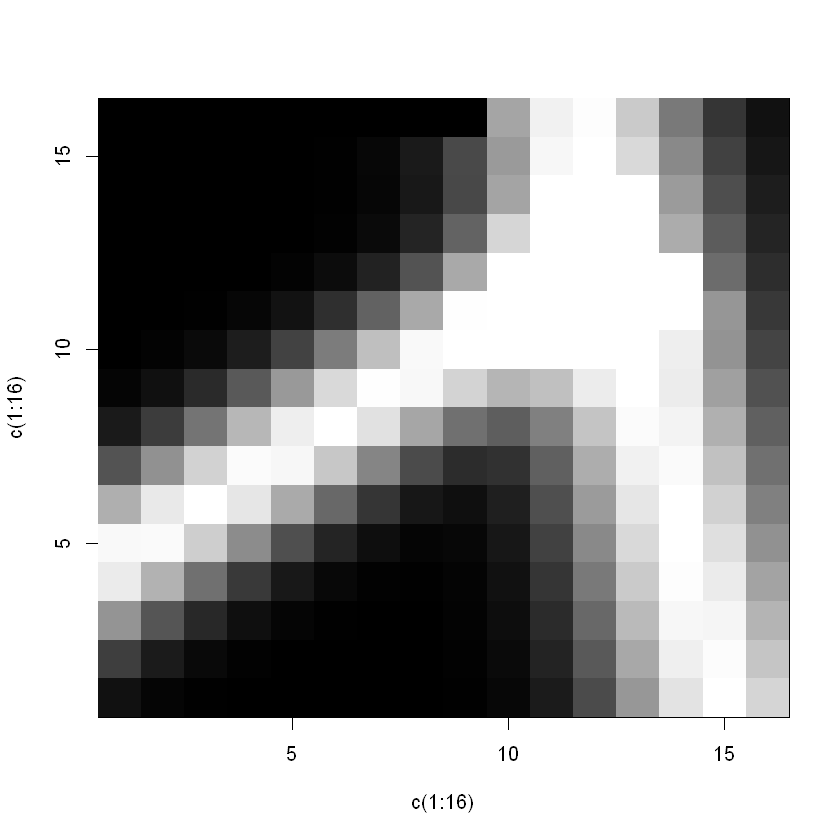

In [11]:
ims = matrix(0,256,1)

for(j in c(-6:2))
{
    ims = matrix(0,256,1)
    for(i in seq(0,-10,-1))
    {
        #rp = mp+(i+5)*c(1,rep(0,9)) 
        rp = mp + (j+1) * c(0,1,rep(0,8))
        rp3 = rp %*% t(er$vectors[,1:10])
        rec = rp3 * sqrt(resvar)
        s1 = stroke(rec[1],rec[2],rec[3],rec[4],rec[5])
        s2 = stroke(rec[6],rec[7],rec[8],rec[9],rec[10])
        im = s1 + s2
        im[im > 1] = 1
        image(c(1:16),c(1:16),256*im,col=gray(c(0:256)/256))
        #ims = cbind(ims,matrix(im[,16:1],256,1))
        readline()
    }
    ims = ims[,2:12]
    ims = t(ims)
    q = ims %*% er$vectors[,1:3]
    q = 256 * q
    points(q[,1],q[,2],col='red')
    lines(q[,1],q[,2],col='red')
}

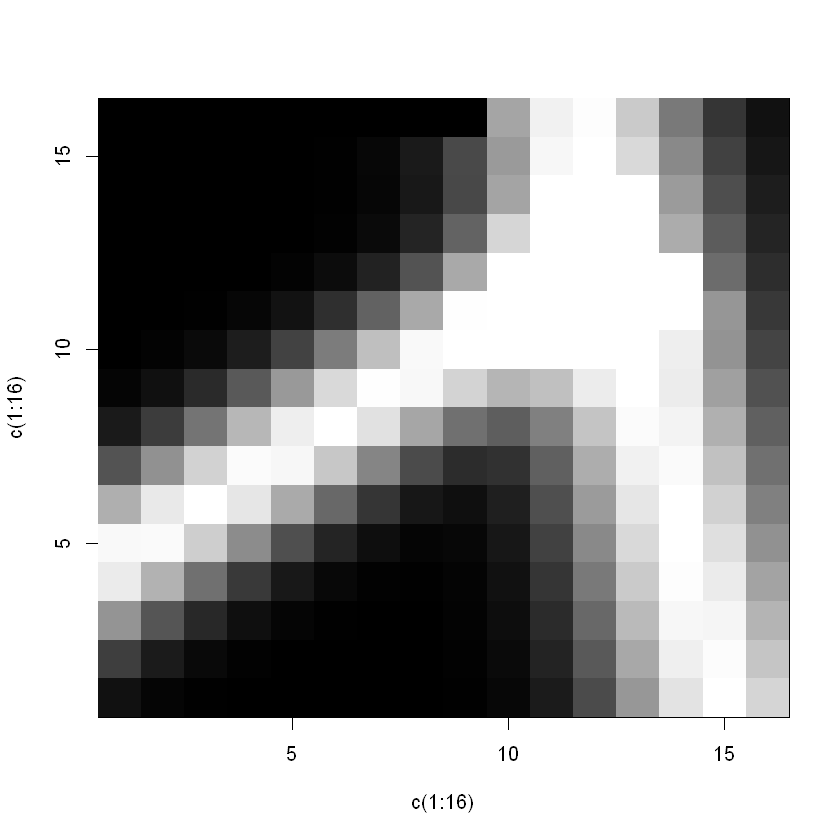

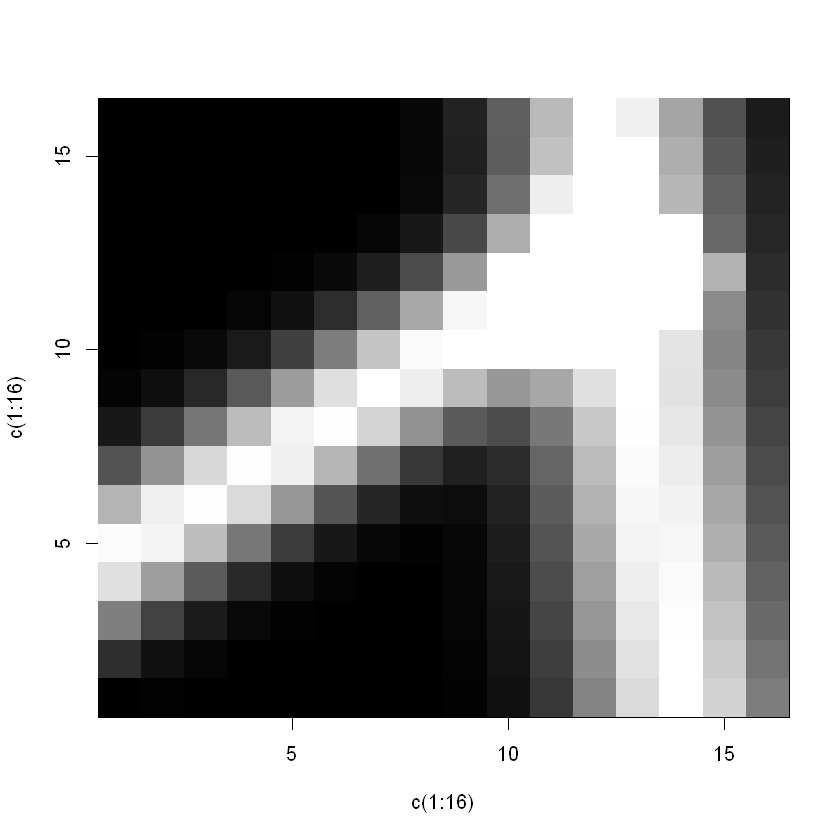

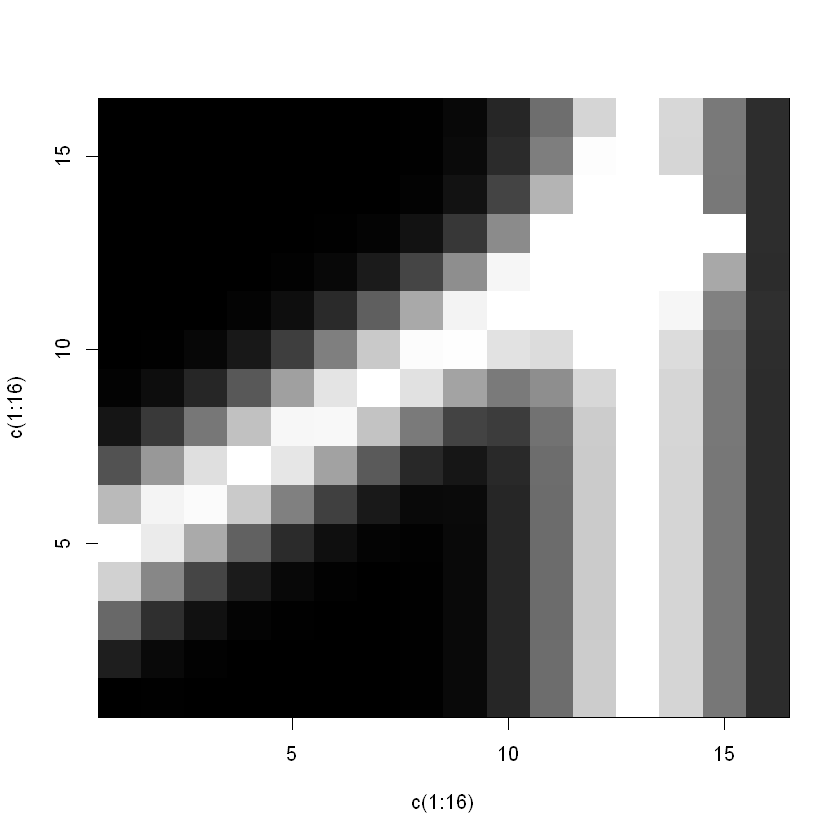

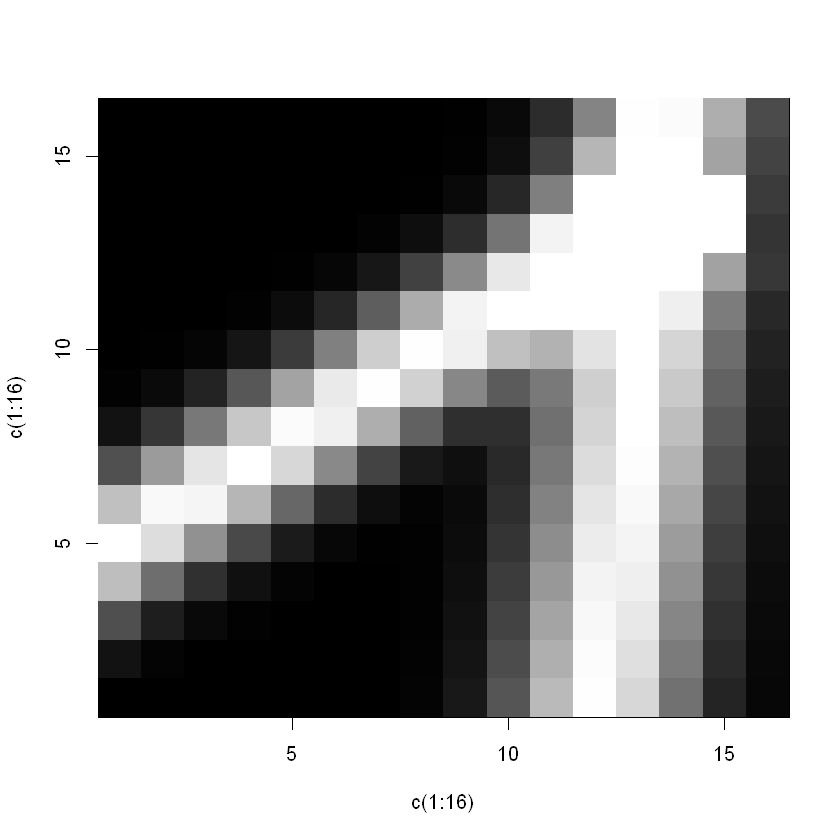

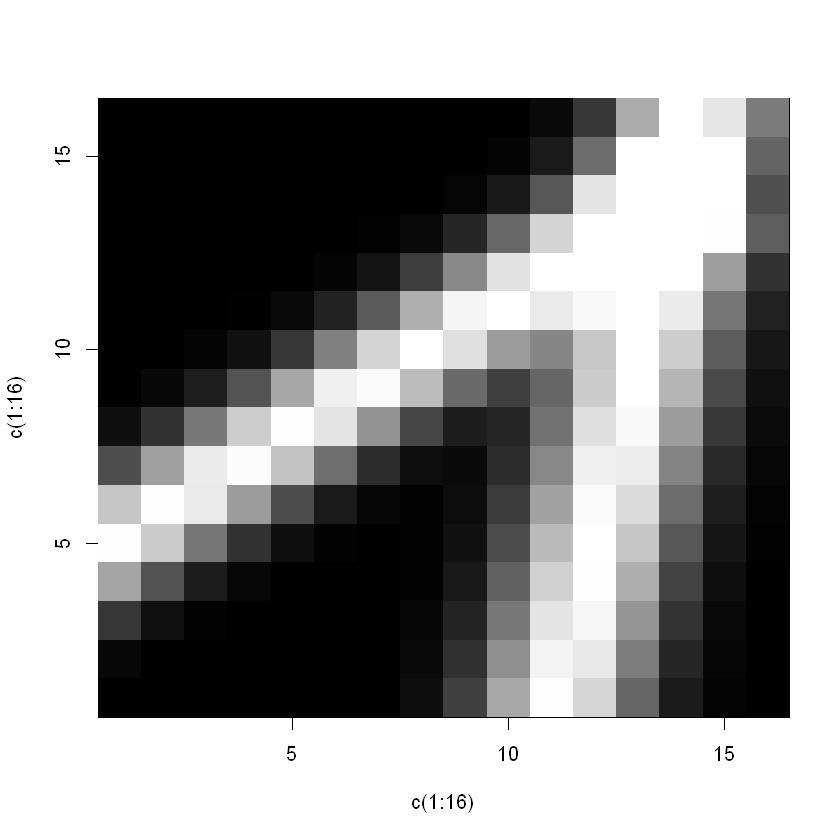

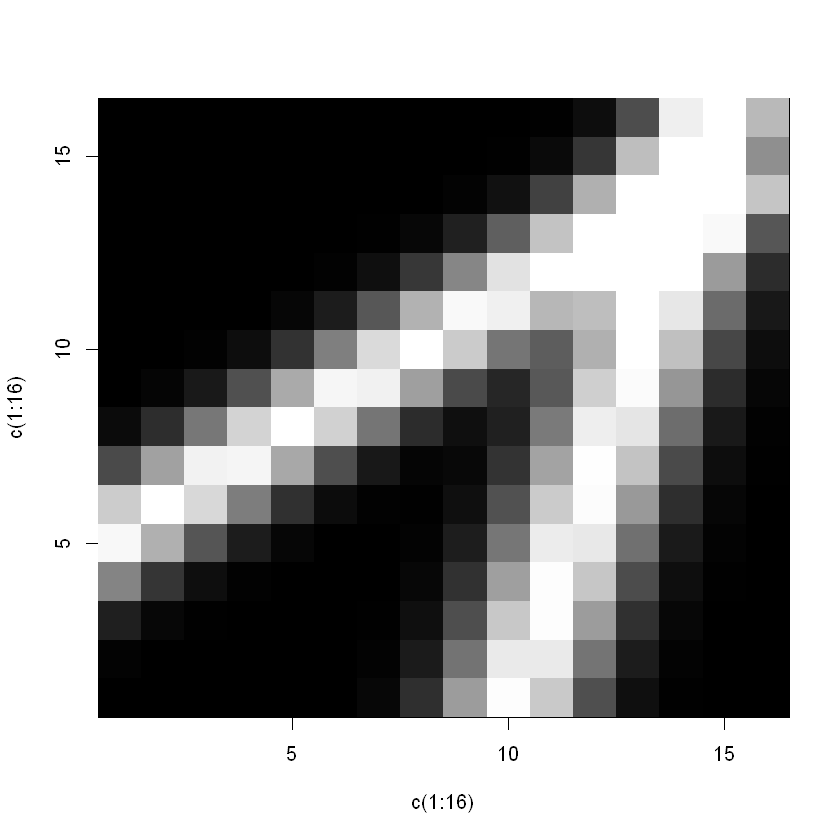

In [ ]:
ims = matrix(0,256,1)

for(j in c(-6:2))
{
    
    #rp = mp+(i+5)*c(1,rep(0,9)) 
    rp = mp + (j+1) * c(0,1,rep(0,8))
    rp3 = rp %*% t(er$vectors[,1:10])
    rec = rp3 * sqrt(resvar)
    s1 = stroke(rec[1],rec[2],rec[3],rec[4],rec[5])
    s2 = stroke(rec[6],rec[7],rec[8],rec[9],rec[10])
    im = s1 + s2
    im[im > 1] = 1
    image(c(1:16),c(1:16),256*im,col=gray(c(0:256)/256))
    #ims = cbind(ims,matrix(im[,16:1],256,1))
    readline()
}
ims = ims[,2:12]
ims = t(ims)
q = ims %*% er$vectors[,1:3]
q = 256 * q
points(q[,1],q[,2],col='red')
lines(q[,1],q[,2],col='red')

In [ ]:
ims = matrix(0,256,1)
for(i in c(1:874))
{
    rec = final[2:12,i]
    s1 = stroke(rec[1],rec[2],rec[3],rec[4],rec[5])
    s2 = stroke(rec[6],rec[7],rec[8],rec[9],rec[10])
    im = s1 + s2
    im = rec[11] * im
    im[im > 1] = 1
    #image(c(1:16),c(1:16),256*im,col=gray(c(0:256)/256))
    ims=cbind(ims,matrix(im[,16:1],256,1))
    #readline()
}
ims = ims[,2:875]
ims = t(ims)
q = ims %*% e$vectors[,1:3]
q = 256 * q
points(q[,1],q[,2],col='blue')

In [13]:
# randomly generate 10000 '1's
ranv = matrix(rnorm(100000),10,10000)
ranv = ranv * sqrt(er$values)
ranv = ranv+mp

ranv3=t(ranv)%*% t(er$vectors)
ranv3=t(ranv3)
ranv3=ranv3*sqrt(resvar)

In [ ]:
ims = matrix(0,256,1)
for(i in c(1:10000))
{
    rec=ranv3[,i]
    rec[1]=max(min(20,rec[1]),10.0)
    rec[2]=max(min(20,rec[2]),10.0)
    rec[6]=max(min(20,rec[6]),10.0)
    rec[7]=max(min(20,rec[7]),10.0)
    rec[3]=max(rec[3],0.5*pi)
    rec[8]=max(rec[8],rec[3]+0.05*pi)
    rec[4]=max(min(28,rec[4]),4.0)
    rec[9]=max(min(28,rec[9]),4.0)
    rec[5]=max(min(7.0,rec[5]),0.1)
    rec[10]=max(min(7.0,rec[10]),0.1)
    s1 = stroke(rec[1],rec[2],rec[3],rec[4],rec[5])
    s2 = stroke(rec[6],rec[7],rec[8],rec[9],rec[10])
    im = s1 + s2
    #im = rec[11] * im
    im[im > 1] = 1
    #image(c(1:16),c(1:16),256*im,col=gray(c(0:256)/256))
    ims = cbind(ims,matrix(im[,16:1],256,1))
    #readline()
}
ims = ims[,2:10000]
ims = t(ims)
q = ims %*% e$vectors[,1:3]
q = 256 * q
points(q[,1],q[,2],col='blue')

In [ ]:
# select points which lie within a small square region of the randomly-generated, blurred '1's
index = 1:10000
group = index[q[,1] > -4.5 & q[,1] < -4 & q[,2] > -0.5 & q[,2] < 0]

In [ ]:
# display the selected images
par(mfrow=c(5,5))
for(i in group)
{
    z = matrix(ims[i,],16,16)
    image(c(1:16),c(1:16),z[,16:1],col=gray(c(0:256)/256))
    readline()
}